#### R-code notes compilation for Week 6, February 22th and 25th

###### Compiled by: Prognadipto Majumder & Bikram Halder, B.Math(hons.) 1st year


In [1]:
runningmean <- function(x, N) {
  y <- sample(x, N, replace = TRUE)
  # THIS samples N points wih replacement
  c <- cumsum(y)
  # cumulative sums of the 1st i values in i th position
  n <- 1:N
  c / n
  # Division is vectorised, mean of 1st i values of y is in ith position
}

Simulating $1000$ trials of $Ber(\frac{1}{2})$

The $1000$ $Ber(\frac{1}{2})$ variables being $X_1,X_2, \ldots ,X_{1000}$,


In [2]:
u <- runningmean(c(0, 1), 1000)

The function returns the mean of the first $i$ random variables in the $i^{th}$ place.
, i.e., `u[i]` = $\frac{X_1+X_2+...+X_i}{i}$

We "guess" the value of `u[i]` will converge to $\frac{1}{2}$ as
`i` gets really large. (It should converge with probability $1$)


In [3]:
library(ggplot2)

Plotting line graph in `ggplot`


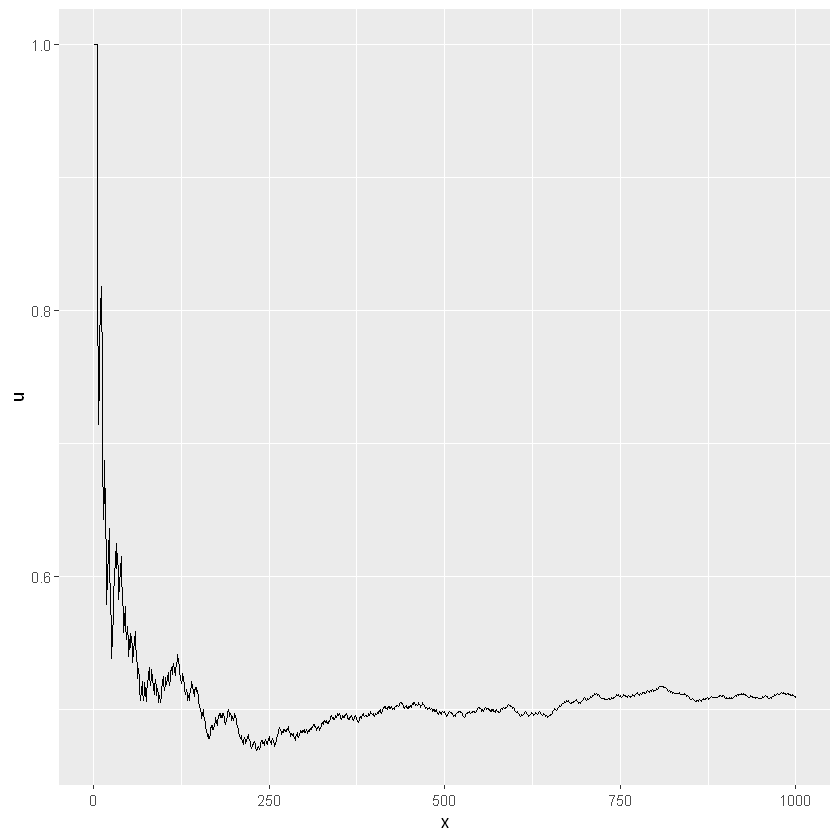

In [4]:
x <- 1:1000
data <- data.frame(u, x)

ggplot(data) +
  geom_line(aes(x = x, y = u))

Printing 10 line graphs in the same plot by `for` loop that adds 10 `geom_line()` layers. For each call, we RANDOMLY assign a colour to graph.


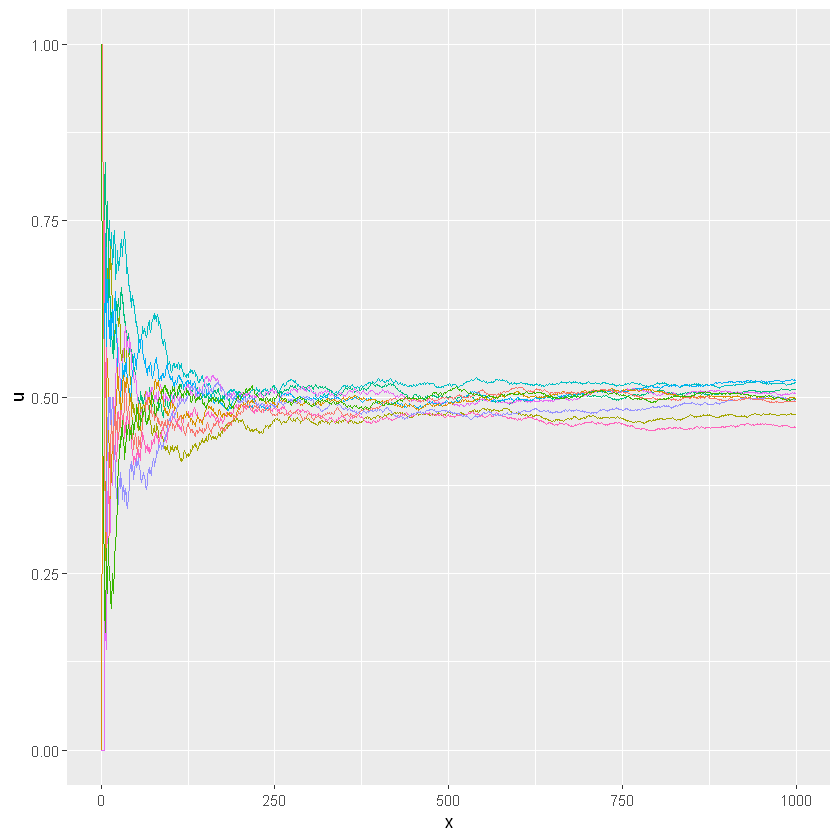

In [5]:
plt <- ggplot()

for (i in 1:10) {
  plt <- plt + geom_line(
    data = data.frame(u = runningmean(c(0, 1), 1000), x),
    mapping = aes(
      x = x, y = u,
      colour = rgb(runif(3), runif(3), runif(3))[1]
    ), show.legend = FALSE
  )
}

plt

Generating $3$ plots in the same frame to visualize the Central Limit Theorem.

In [6]:
plt1 <- ggplot()

x <- 1:100
for (i in 1:10) {
  plt1 <- plt1 + geom_line(
    data = data.frame(u = runningmean(c(0, 1), 100), x),
    mapping = aes(
      x = x, y = u,
      colour = rgb(runif(3), runif(3), runif(3))[1]
    ), show.legend = FALSE
  )
}


In [7]:
plt2 <- ggplot()

x <- 1:1000
for (i in 1:10) {
  plt2 <- plt2 + geom_line(
    data = data.frame(u = runningmean(c(0, 1), 1000), x),
    mapping = aes(
      x = x, y = u,
      colour = rgb(runif(3), runif(3), runif(3))[1]
    ), show.legend = FALSE
  )
}


In [8]:
plt3 <- ggplot()

x <- 1:10000
for (i in 1:10) {
  plt3 <- plt3 + geom_line(
    data = data.frame(u = runningmean(c(0, 1), 10000), x),
    mapping = aes(
      x = x, y = u,
      colour = rgb(runif(3), runif(3), runif(3))[1]
    ), show.legend = FALSE
  )
}


Loading library `cowplot` to run the function `plot_grid()` which is used to put the above 3 plots in the same frame.

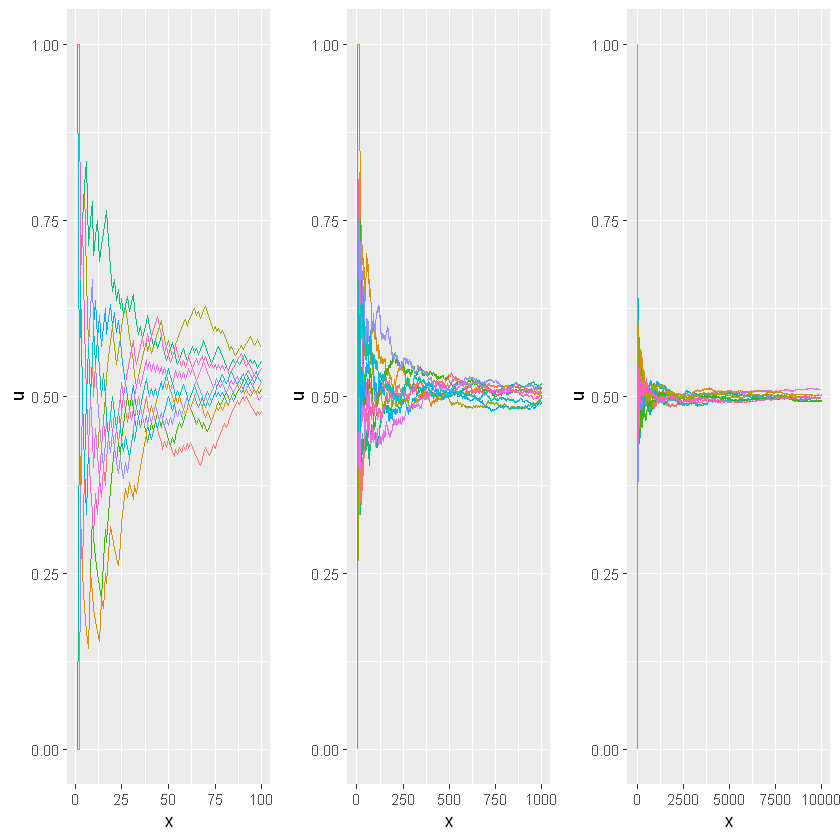

In [9]:
library("cowplot")
plot_grid(plt1, plt2, plt3, ncol = 3, nrow = 1)